# Comparing Clustering Algorithm Effectiveness

In this lab you'll try three clustering algorithms we've covered on 7 different datasets specifically designed to evaluate clustering algorithm effectiveness.

This lab is exploratory and data visualization heavy!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pylab as pl

### 1. Load the datasets

Each of the seven datasets have 3 columns:

    x
    y
    label
    
Since they each only have two variables, they are easy to examine visually. The label column is the "true" label for the data that you will compare to the clusters the algorithms find.

In [2]:
flame = pd.read_csv('./datasets/flame.csv')
agg = pd.read_csv('./datasets/aggregation.csv')
comp = pd.read_csv('./datasets/compound.csv')
jain = pd.read_csv('./datasets/jain.csv')
path = pd.read_csv('./datasets/pathbased.csv')
r15 = pd.read_csv('./datasets/r15.csv')
spiral = pd.read_csv('./datasets/spiral.csv')

In [3]:
flame.head()

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2


In [4]:
flame['label'].unique()

array([1, 2], dtype=int64)

In [5]:
agg.head()

,x,y,label
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2


In [6]:
comp.head()

,x,y,label
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1


In [7]:
jain.head()

,x,y,label
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2


In [8]:
path.head()

,x,y,label
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1


In [9]:
r15.head()

,x,y,label
0,9.802,10.132,1
1,10.350,9.768,1
2,10.098,9.988,1
3,9.730,9.910,1
4,9.754,10.430,1


---

### 2. Plot each of the datasets with the true labels colored

The datasets have different numbers of unique labels, so you will need to figure out how many there are for each one and color the clusters accordingly (r15 has 15 different clusters).

In [10]:
flame.label.value_counts()

2    153
1     87
Name: label, dtype: int64

In [11]:
def plot_clusters(df, title):
    fig, ax = plt.subplots(figsize=(15,10))
    colors = ['red', 'green', 'blue', 'orange', 'yellow', 'purple', 'brown', 'black', 'cyan', 'lightpink', 'pink',
             'lime', 'skyblue']
    ax.scatter(df['x'], df['y'], c=df.label, cmap=pl.cm.Spectral)
    plt.title(title, fontsize=20)
    plt.show()

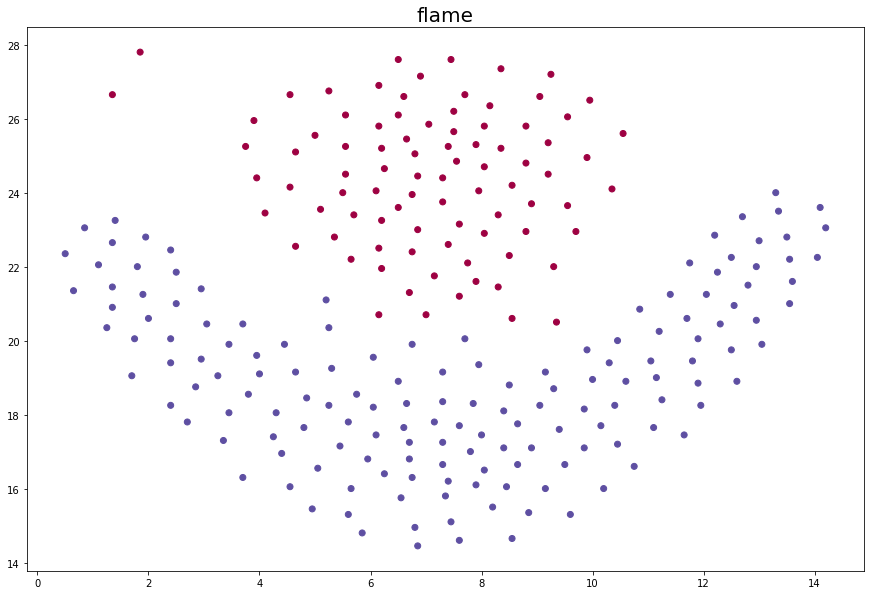

In [12]:
plot_clusters(flame, 'flame')

In [13]:
titles = ['flame', 'agg', 'comp', 'jain', 'path', 'r15', 'spiral']
datasets = [flame, agg, comp, jain, path, r15, spiral]

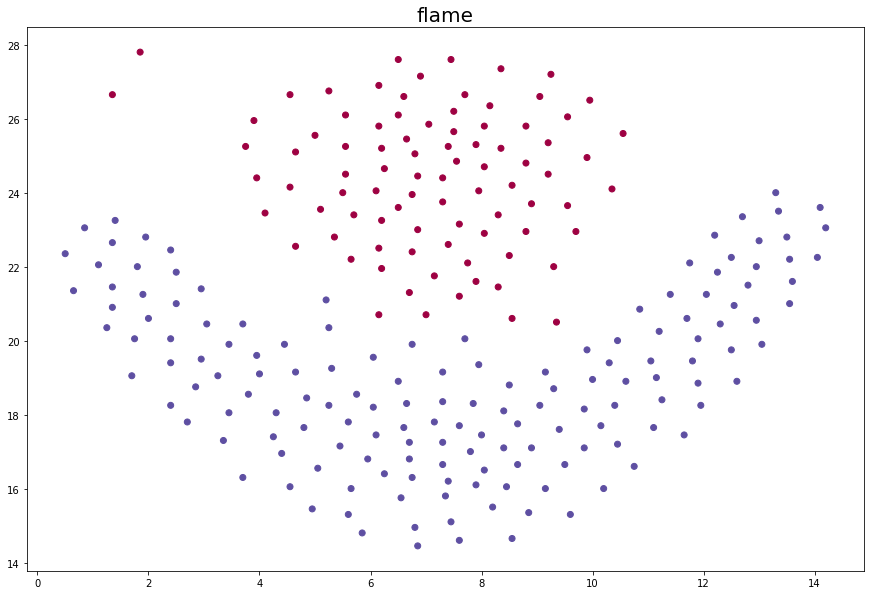

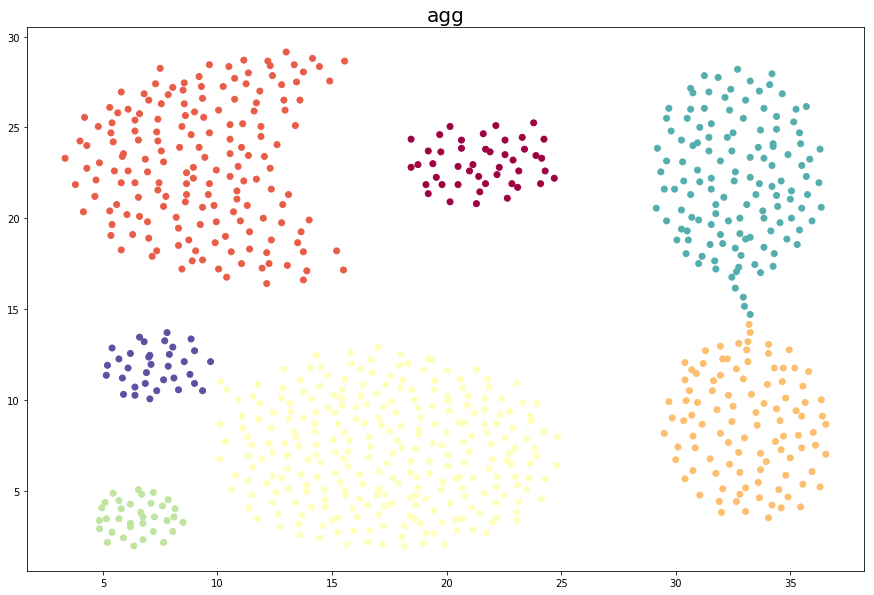

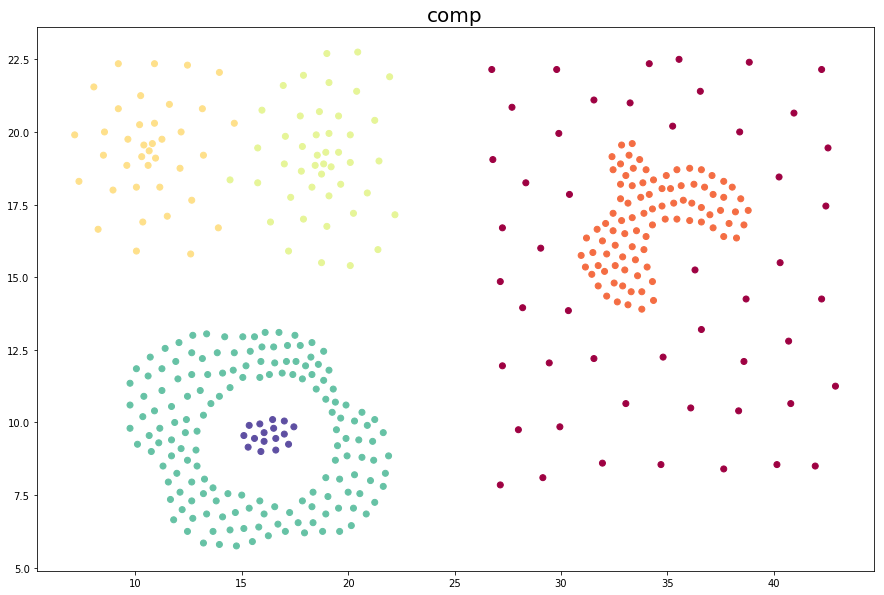

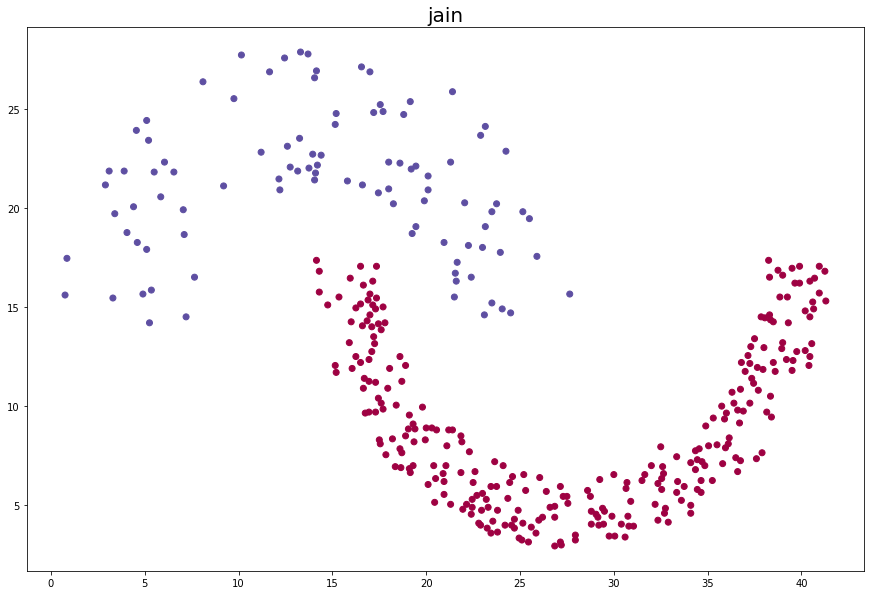

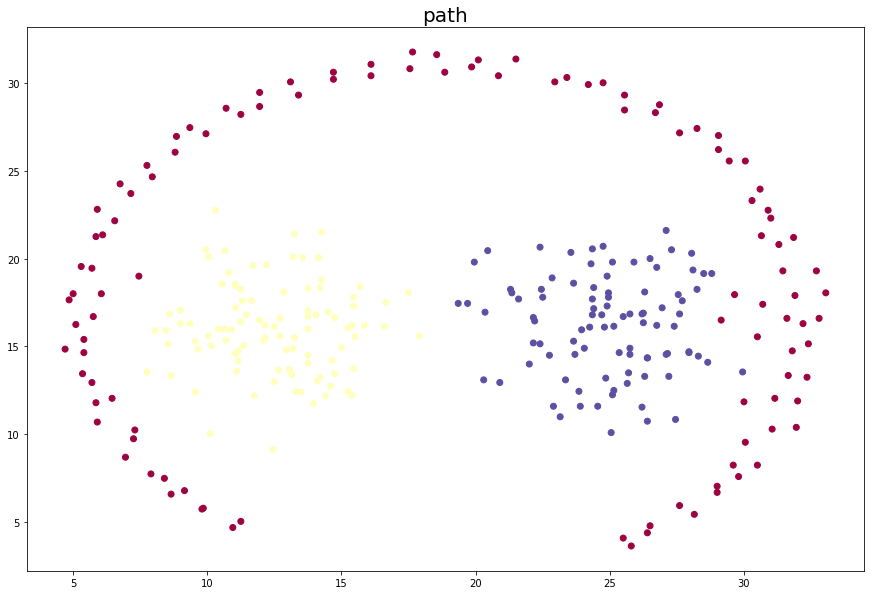

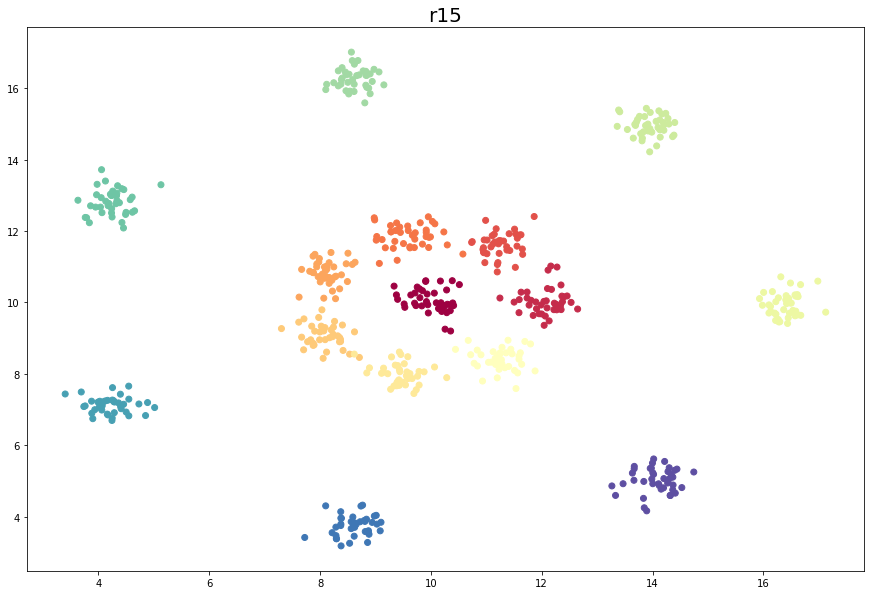

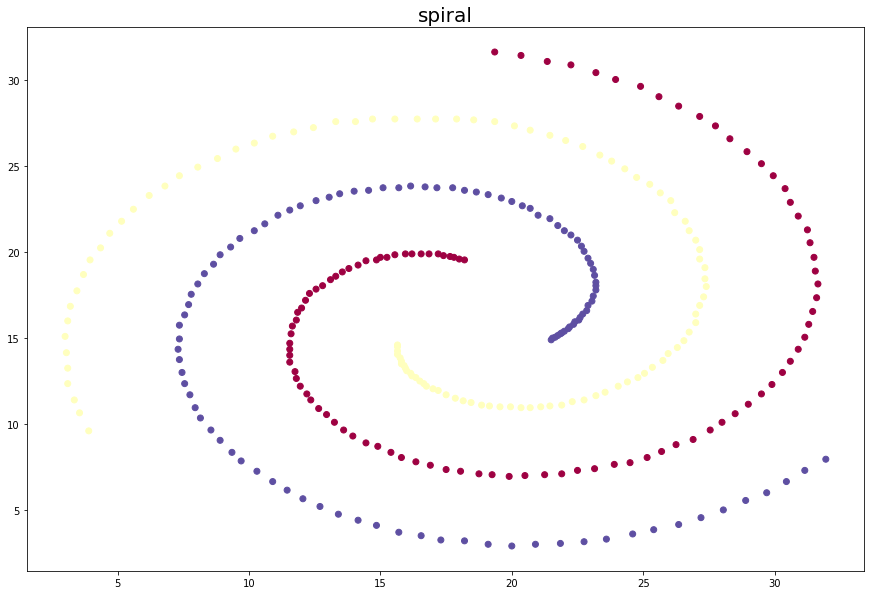

In [14]:
for df, title in zip(datasets, titles):
    plot_clusters(df, title)

---

### 3. Write a plotting function or functions to compare the performance of three clustering algorithms

Below three clustering algorithms we have covered earlier in the class are loaded in.

    KMeans: k-means clustering
    AgglomerativeClustering: Hierarchical clustering (bottom-up)
    DBSCAN: density based clustering
    
Your function or functions should allow you to visually examine the effect of changing different parameters in the clustering algorithms. The parameters that you should explore at least are:

    KMeans:
        n_clusters
    AgglomerativeClustering:
        n_clusters
    DBSCAN
        eps
        min_samples
        
You are, of course, welcome to explore other parameters for these models.


In [15]:
km = KMeans(n_clusters=2, init='k-means++')
km.fit(flame.loc[:, ['x', 'y']], flame['label'])

km_labels = km.labels_

In [16]:
ag = AgglomerativeClustering(n_clusters=2)
ag.fit(flame.loc[:, ['x','y']], flame['label'])
ag_labels = ag.labels_

In [17]:
db = DBSCAN(eps=.7, min_samples=4)
db.fit(flame.loc[:, ['x','y']], flame['label'])
db_labels = db.labels_

In [18]:
lb = [km_labels, ag_labels, db_labels]

In [19]:
def plot_clusters_kmeans(df, title, k_clusters):
    km = KMeans(n_clusters=k_clusters)
    km.fit(df.loc[:, ['x', 'y']], df['label'])
    km_labels = km.labels_
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(df['x'], df['y'], c=km_labels, cmap=pylab.cm.jet)
    plt.title('Kmeans-' + title, fontsize=20)
    plt.show()

In [20]:
def plot_clusters_ag(df, title, clusters):
    ag = AgglomerativeClustering(n_clusters=clusters)
    ag.fit(df.loc[:, ['x','y']], df['label'])
    ag_labels = ag.labels_
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(df['x'], df['y'], c=ag_labels, cmap=pl.cm.Spectral)
    plt.title('Agglomerative-' + title, fontsize=20)
    plt.show()

In [31]:
def plot_clusters_db(df, title, eps, samples):
    db = DBSCAN(eps=eps, min_samples=samples)
    db.fit(df.loc[:, ['x','y']], df['label'])
    db_labels = db.labels_
    
    fig, ax = plt.subplots(figsize=(15,10))
    ax.scatter(df['x'], df['y'], c=db_labels, cmap=pl.cm.Spectral)
    plt.title('DB-Scan_' + title, fontsize=20)
    plt.show()

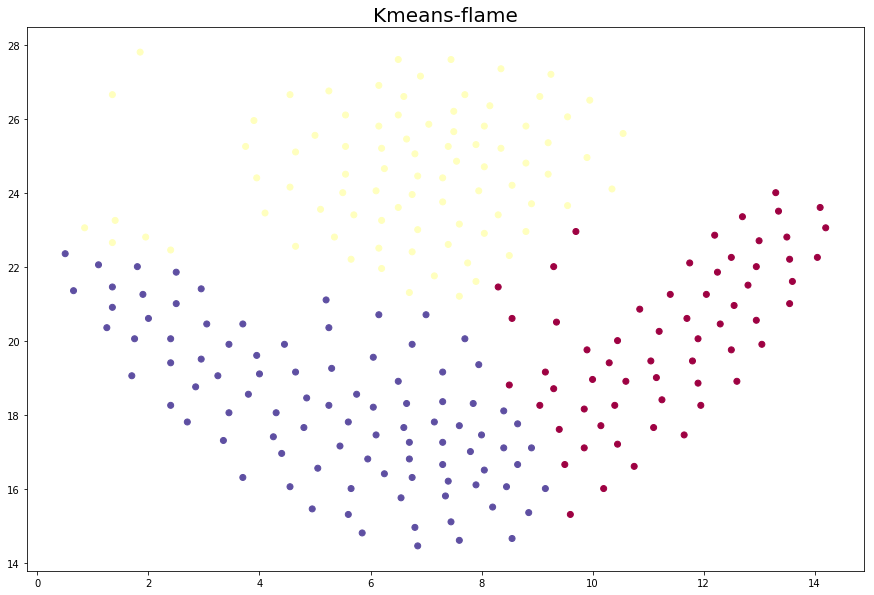

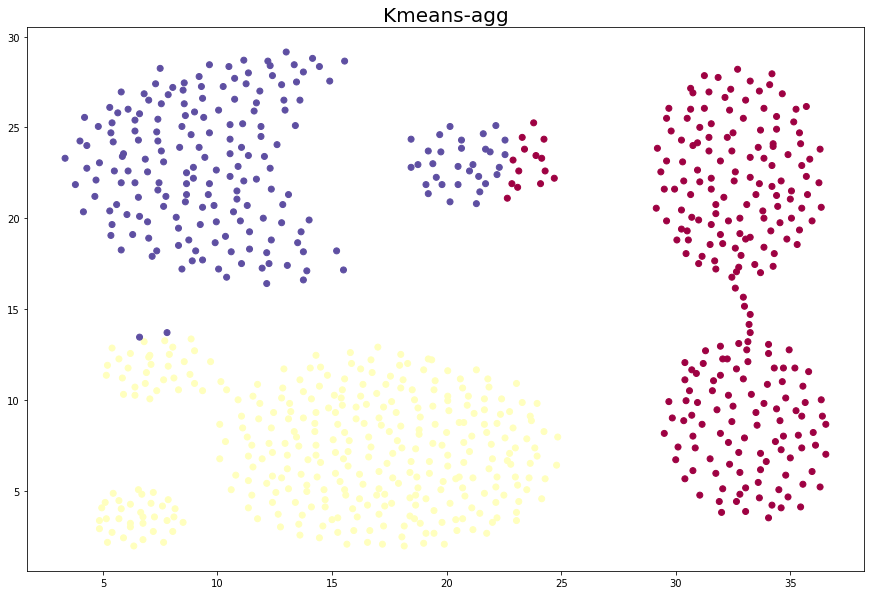

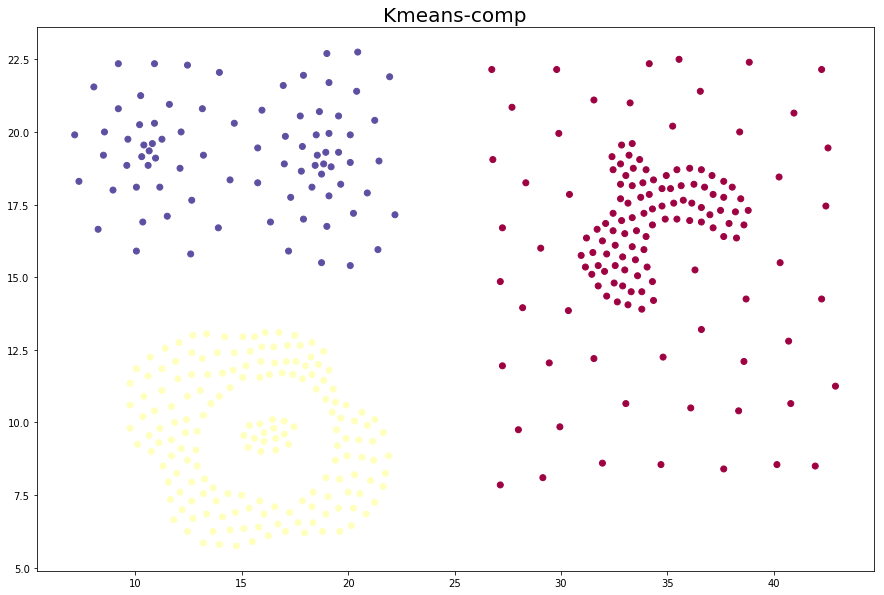

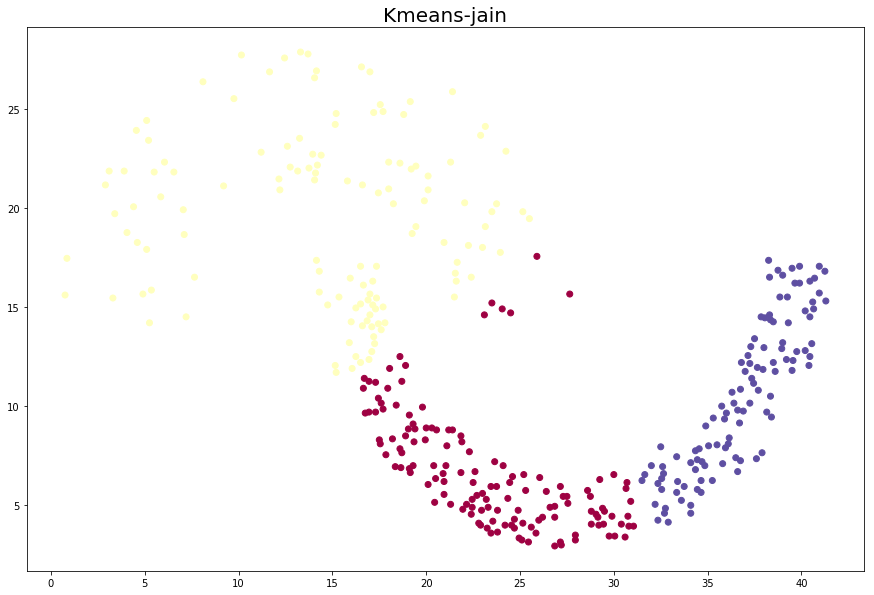

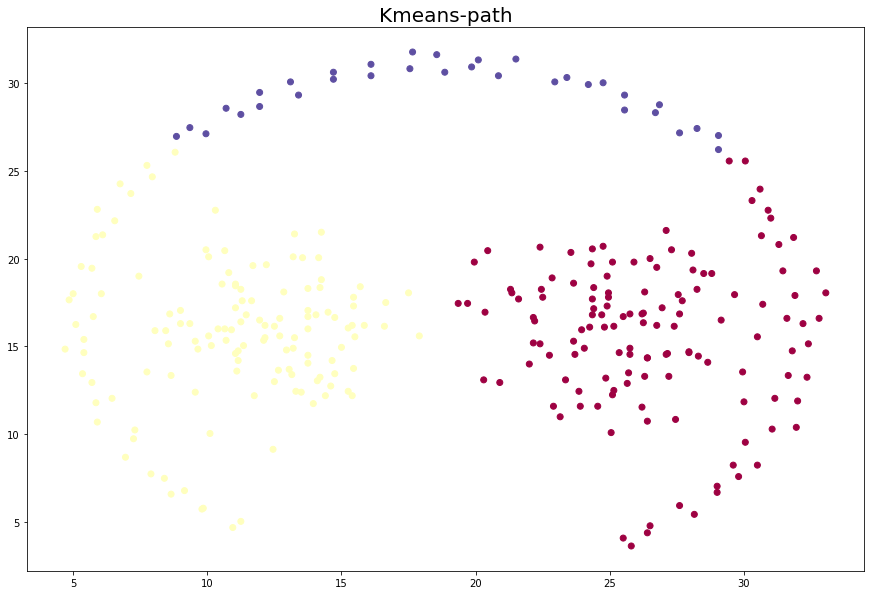

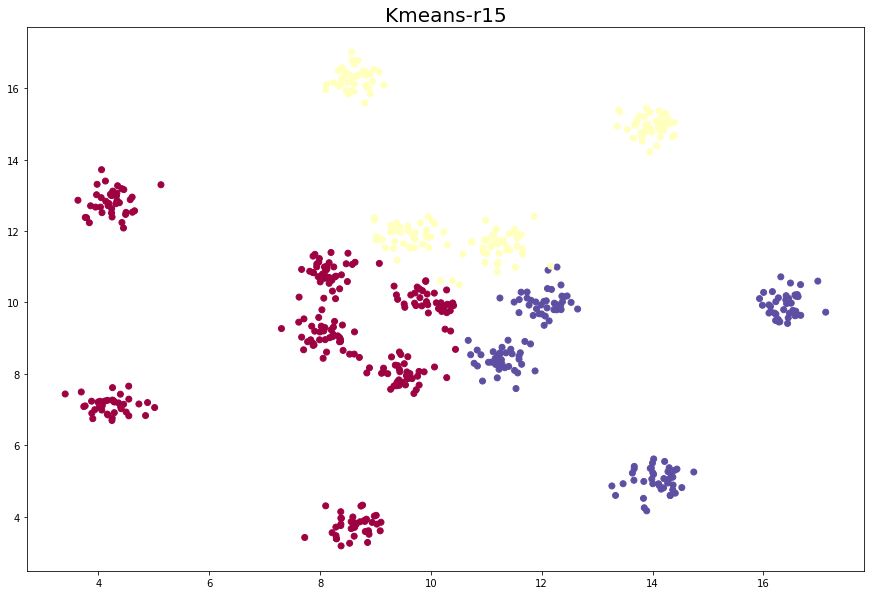

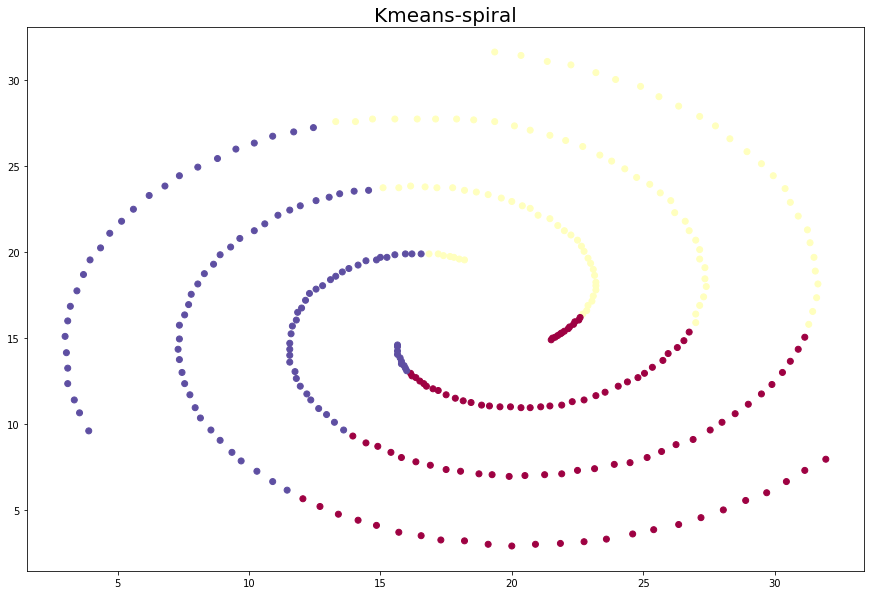

In [23]:
for df, title in zip(datasets, titles): #Kmean plots
    plot_clusters_kmeans(df, title, 3)

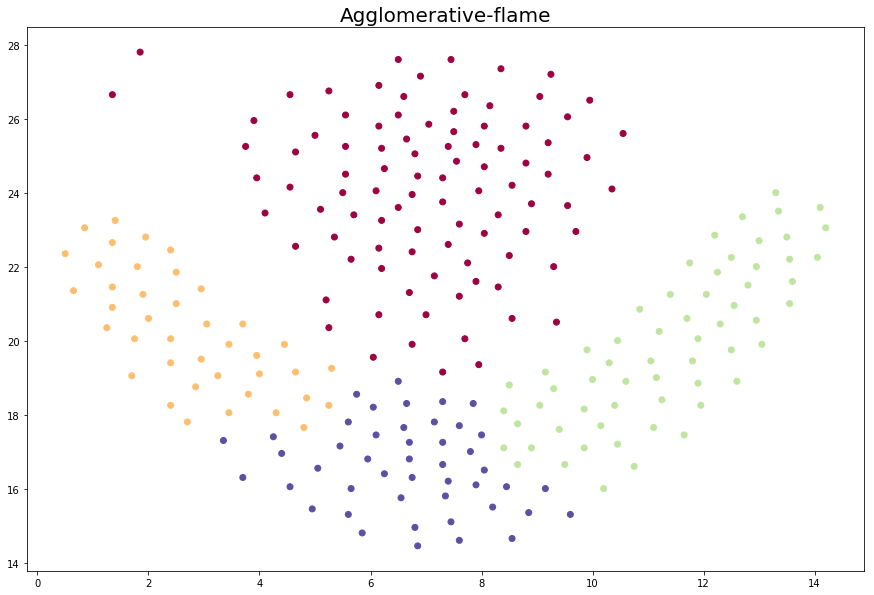

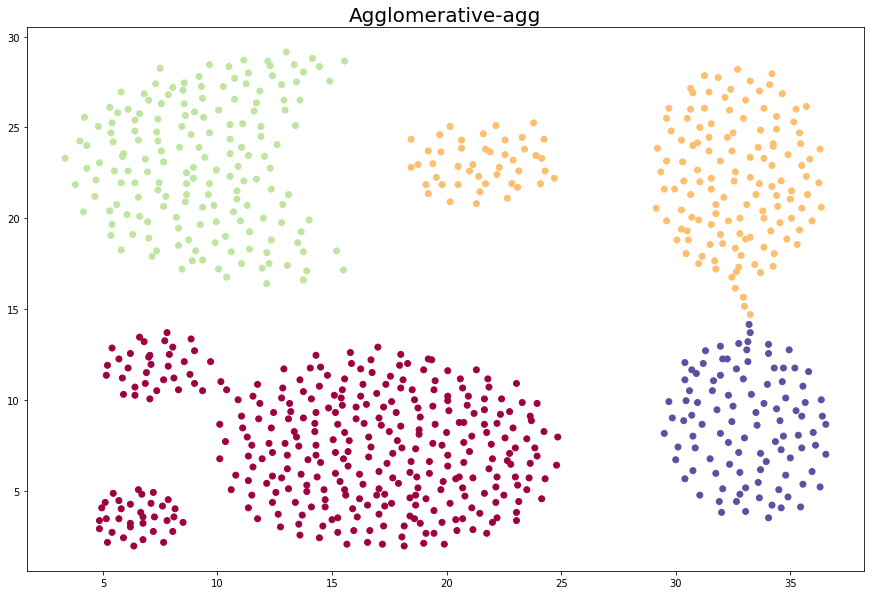

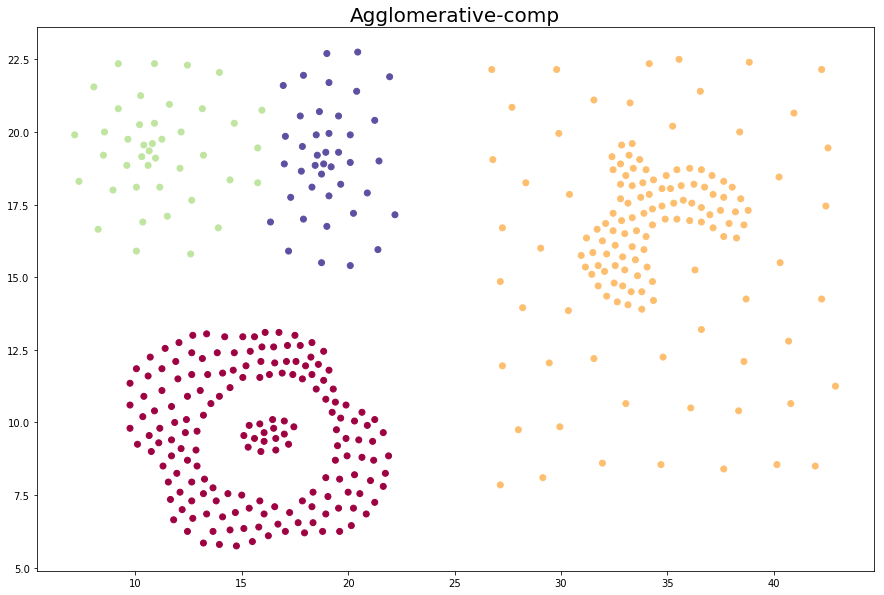

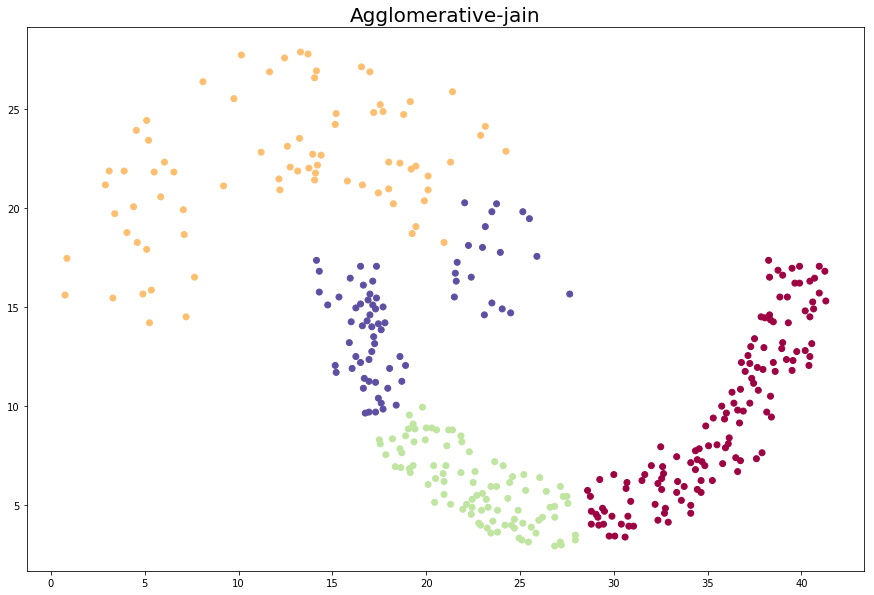

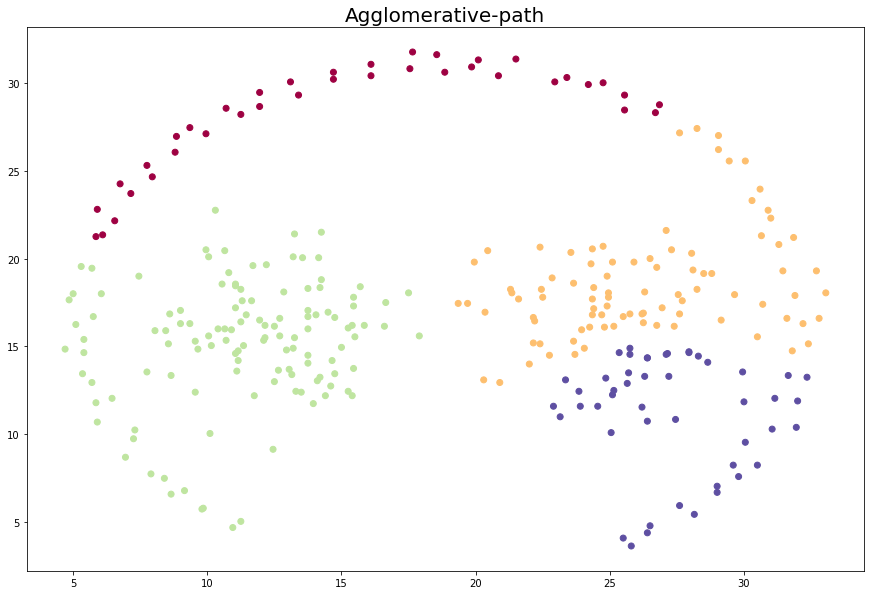

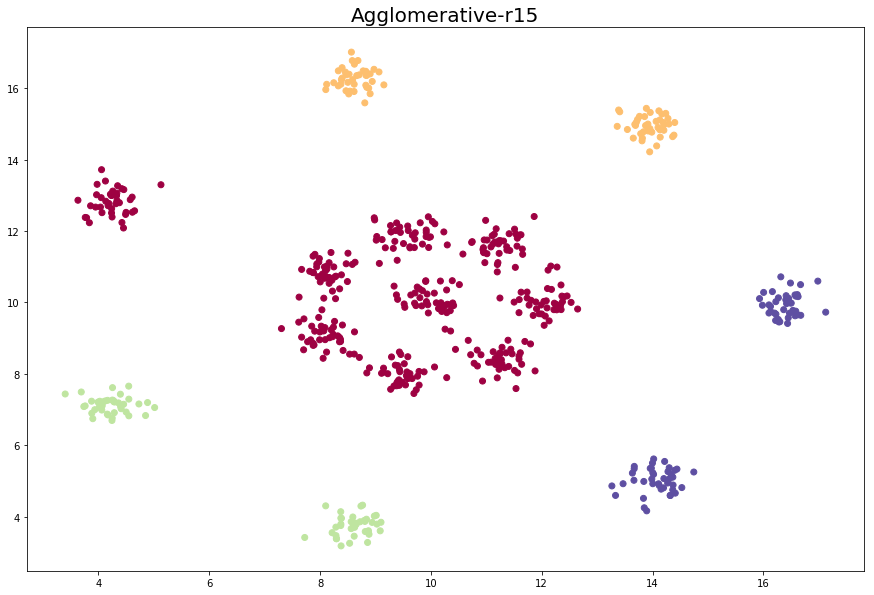

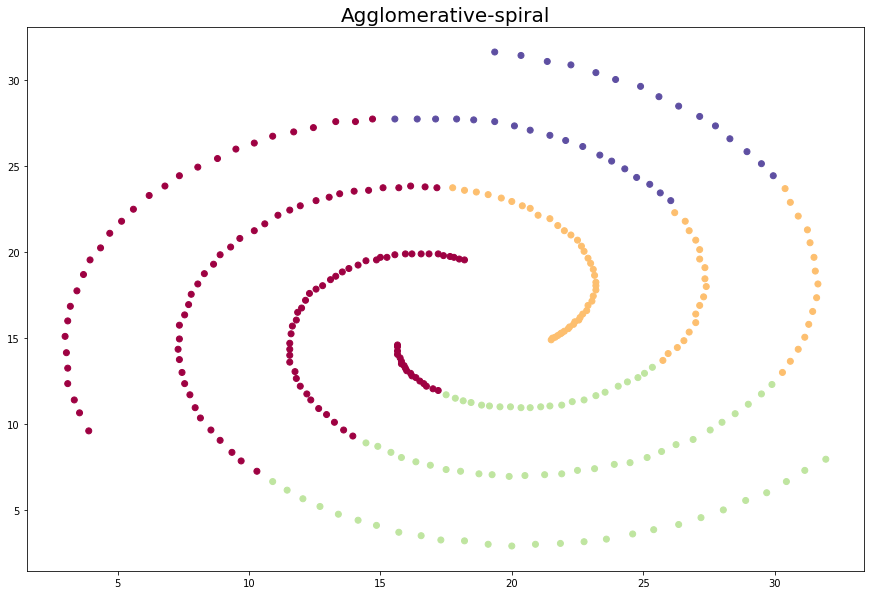

In [24]:
for df,title in zip(datasets, titles): # Agglomerative clustering
    plot_clusters_ag(df, title,4)

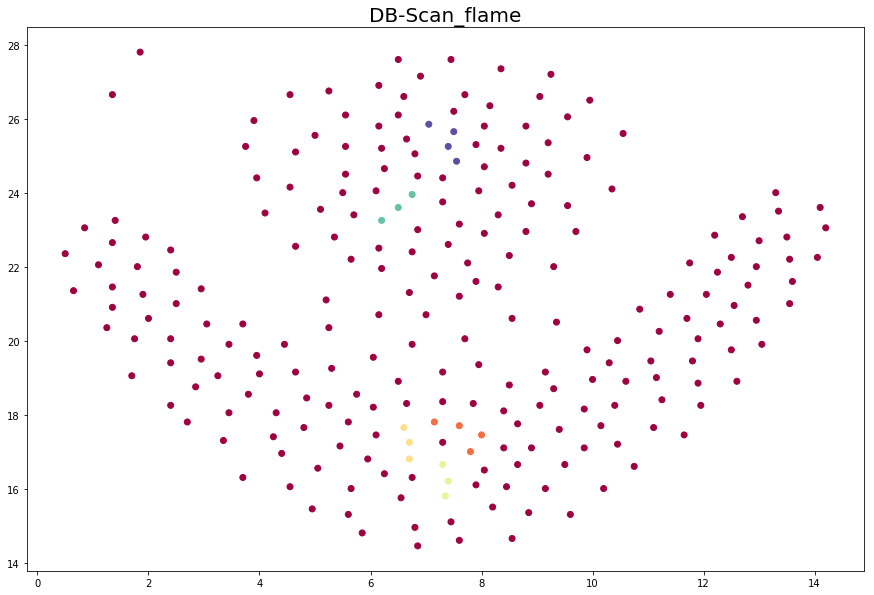

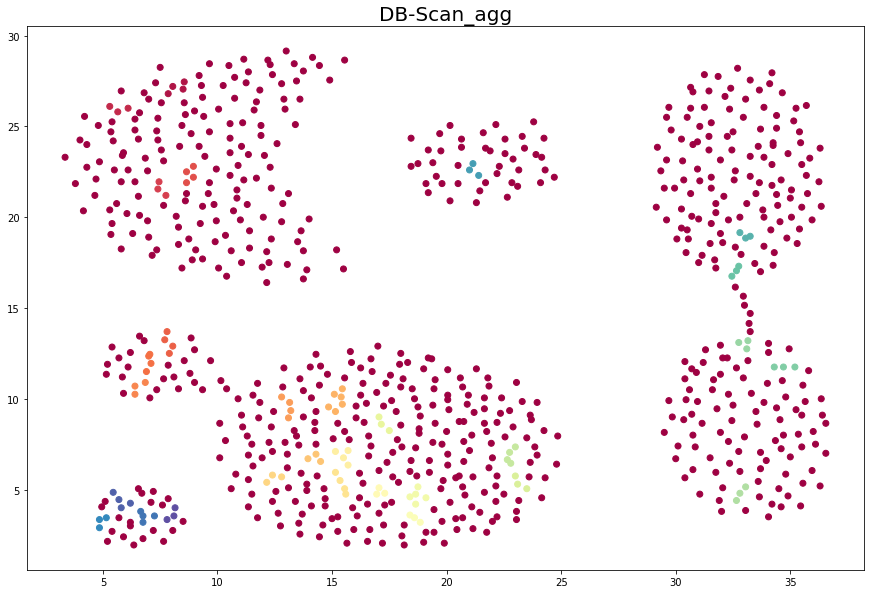

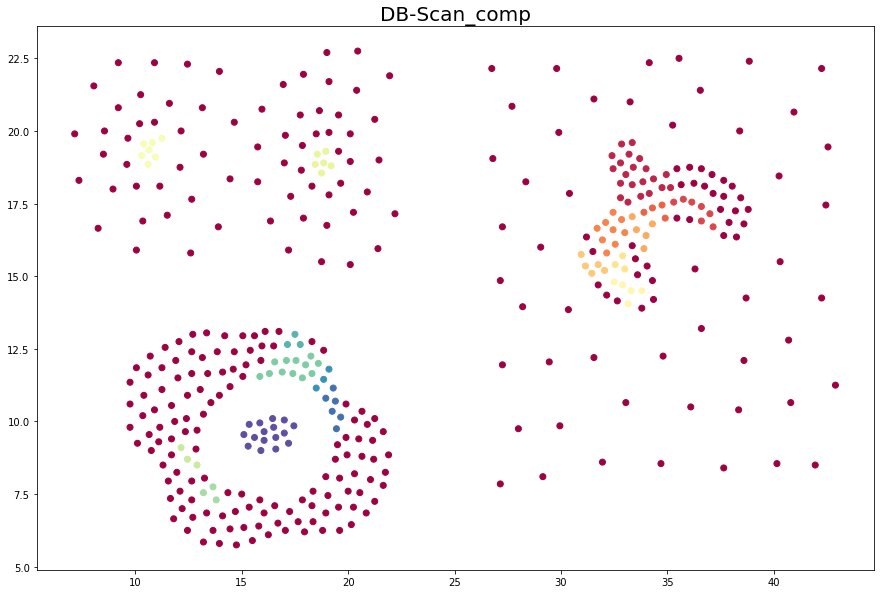

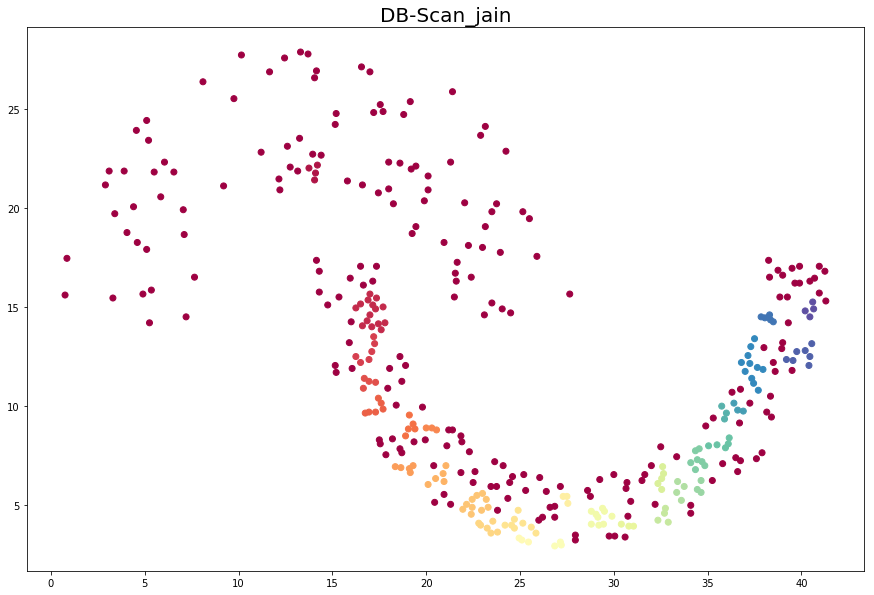

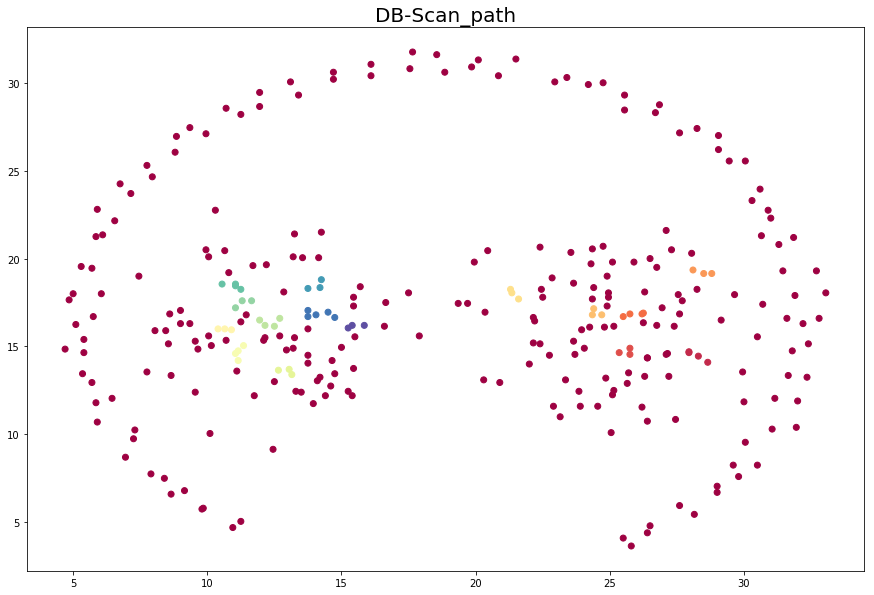

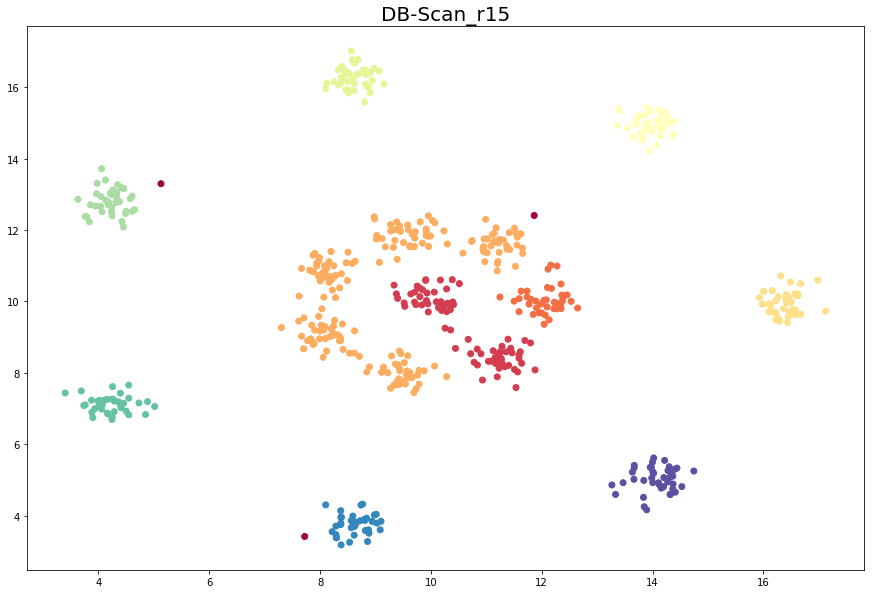

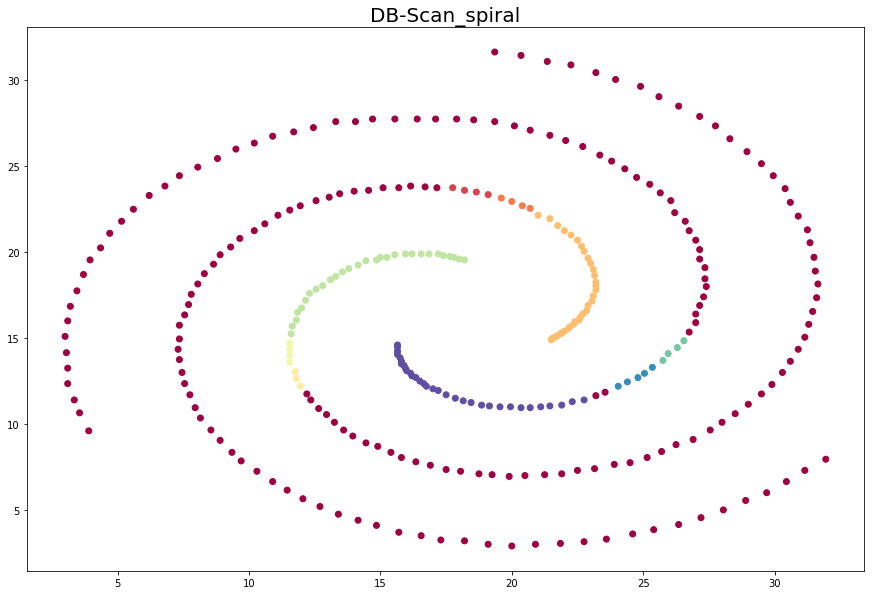

In [22]:
for df,title in zip(datasets, titles): # DB Scan clustering
    plot_clusters_db(df, title, 3)

## 4. Tinkering with clustering parameters

In the next sections, play around with the parameters for the clustering algorithms to see their effect and try to get clusters that make sense. There is no right answer here, as these are unsupervised techniques.

---

### 4.1 Find good parameters for the `flame` dataset

Which algorithm (visually) performs best?

In [42]:
def overall_plot_builder(df, title, p, eps=None):
    print(plot_clusters_kmeans(df, title, p))
    print(plot_clusters_ag(df, title, p))
    print(plot_clusters_db(df, title, p, eps))

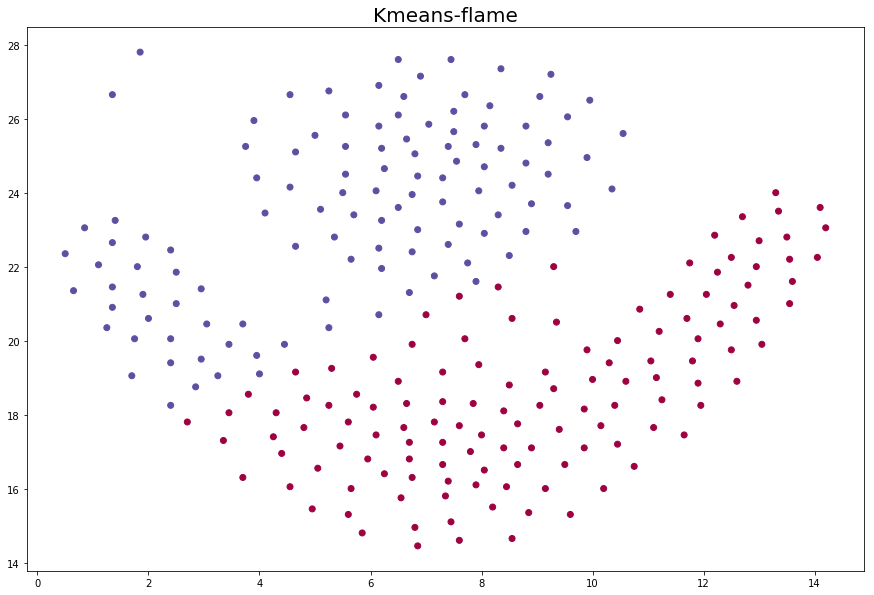

None


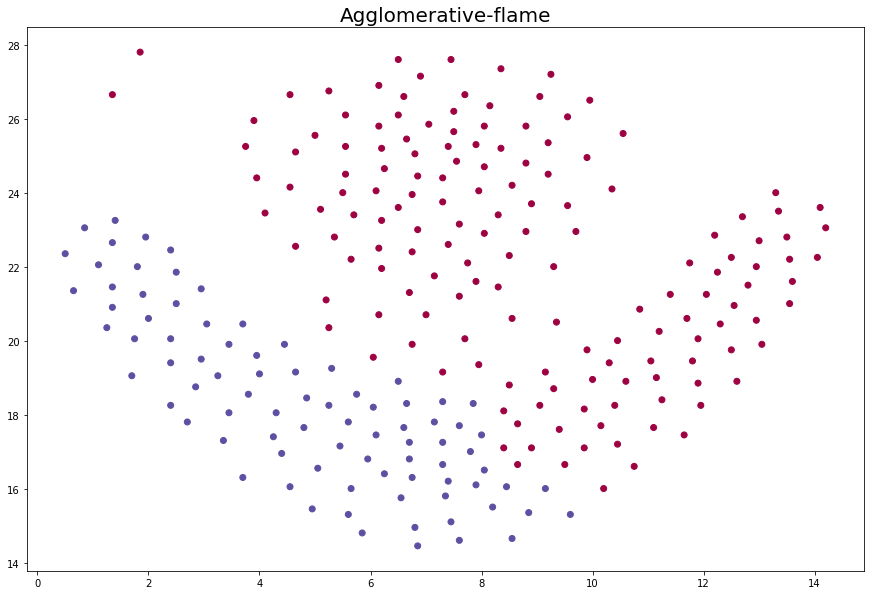

None


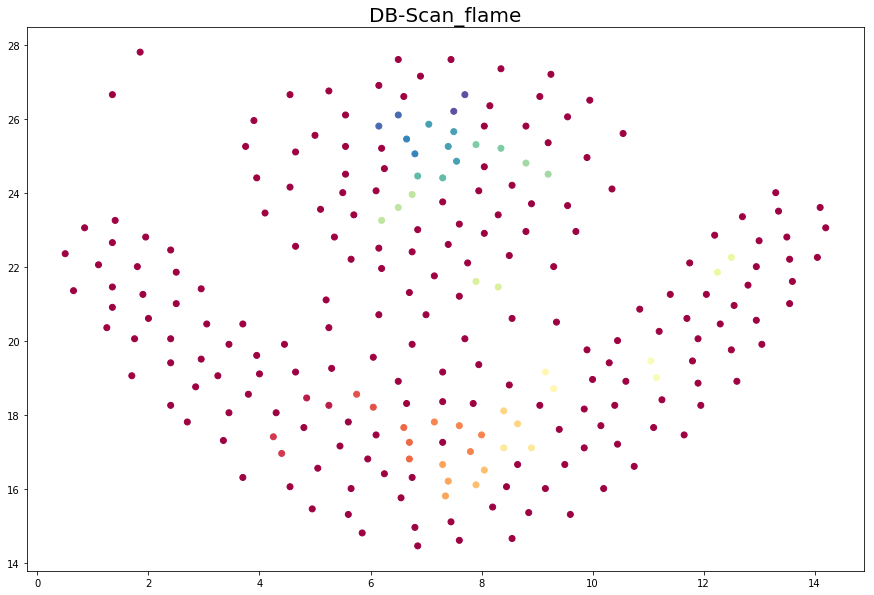

None


In [24]:
overall_plot_builder(flame, 'flame', 2) # kmean is the best with 2 centroids

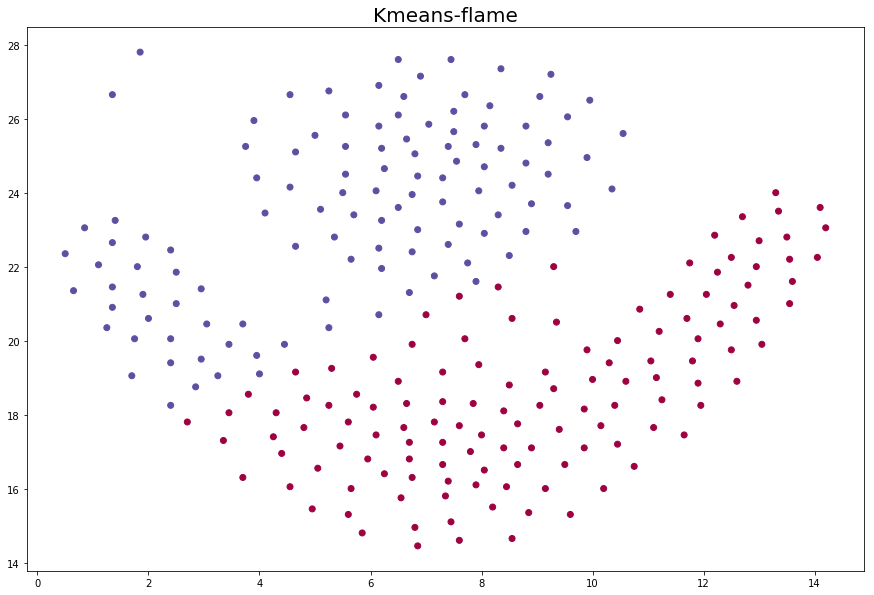

In [138]:

plot_clusters_kmeans(flame, 'flame', 2)

---

### 4.2 Find good parameters for the `agg` dataset

Which algorithm (visually) performs best?

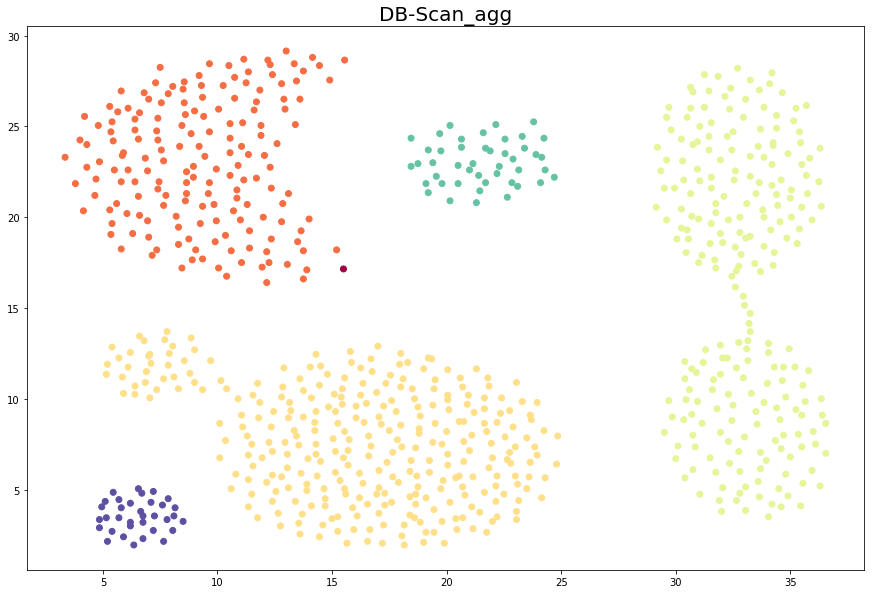

In [43]:
plot_clusters_db(agg, 'agg', 1.5, 4) # dbscan with 1.5 eps and 4 min_samples is the best

---

### 4.3 Find good parameters for the `comp` dataset

Which algorithm (visually) performs best?

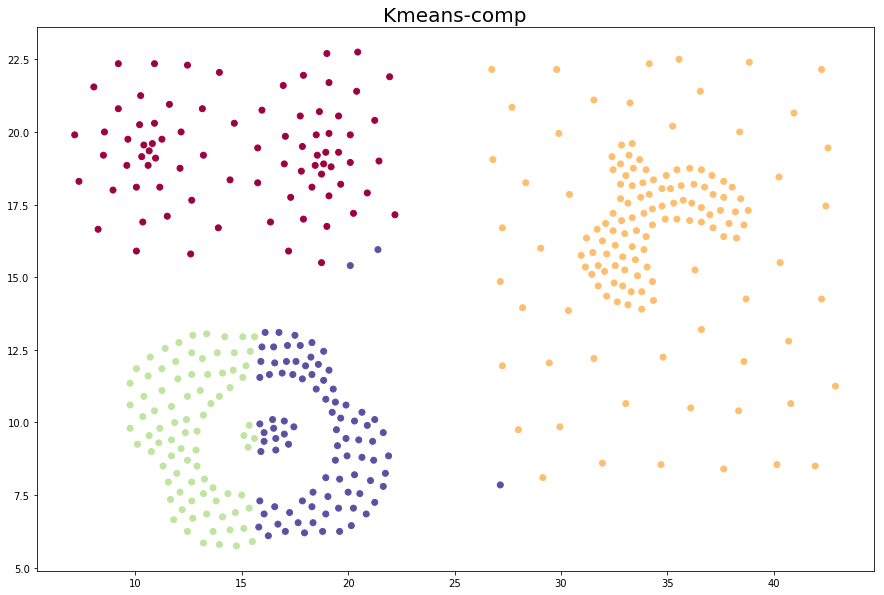

None


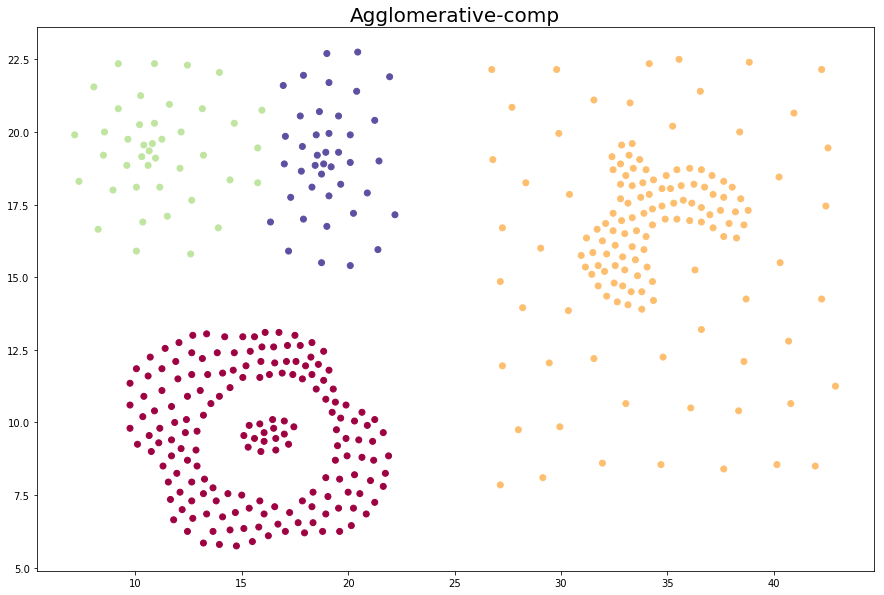

None


TypeError: '>=' not supported between instances of 'int' and 'NoneType'

In [47]:
overall_plot_builder(comp, 'comp', 4) # agglomerative is the best

---

### 4.4 Find good parameters for the `jain` dataset

Which algorithm (visually) performs best?

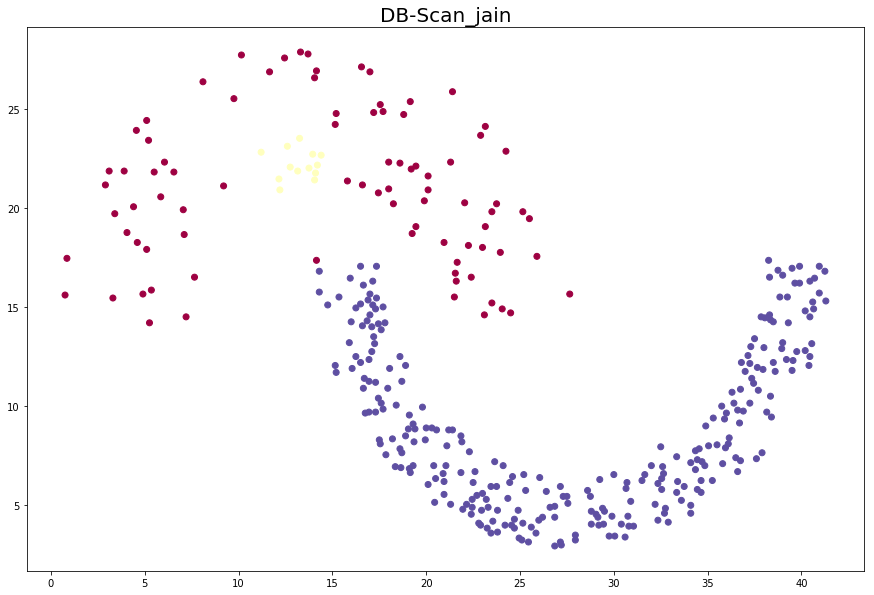

In [77]:
plot_clusters_db(jain, 'jain', 1.9, 13) # DBscan with 1.9 eps distance and 13 min_samples is the best algorithim

---

### 4.5 Find good parameters for the `pathbased` dataset

Which algorithm (visually) performs best?

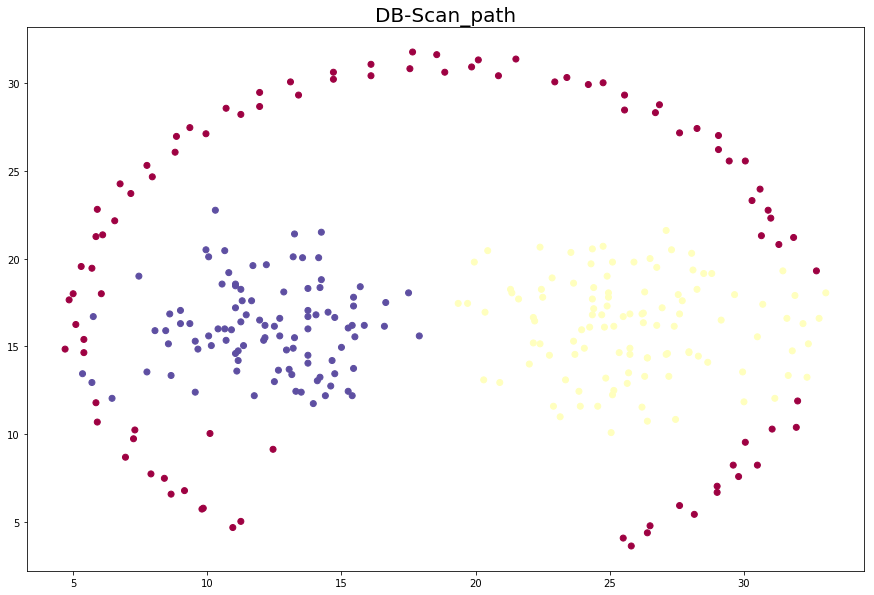

In [87]:
plot_clusters_db(path, 'path', 2.5, 10) # best parameters clusters for DBSCAN

---

### 4.6 Find good parameters for the `r15` dataset

Which algorithm (visually) performs best?

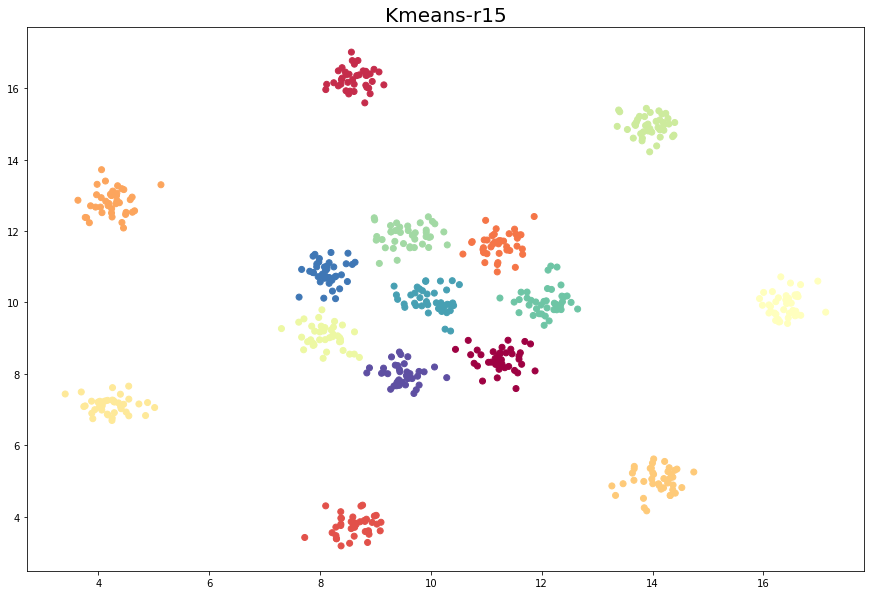

None


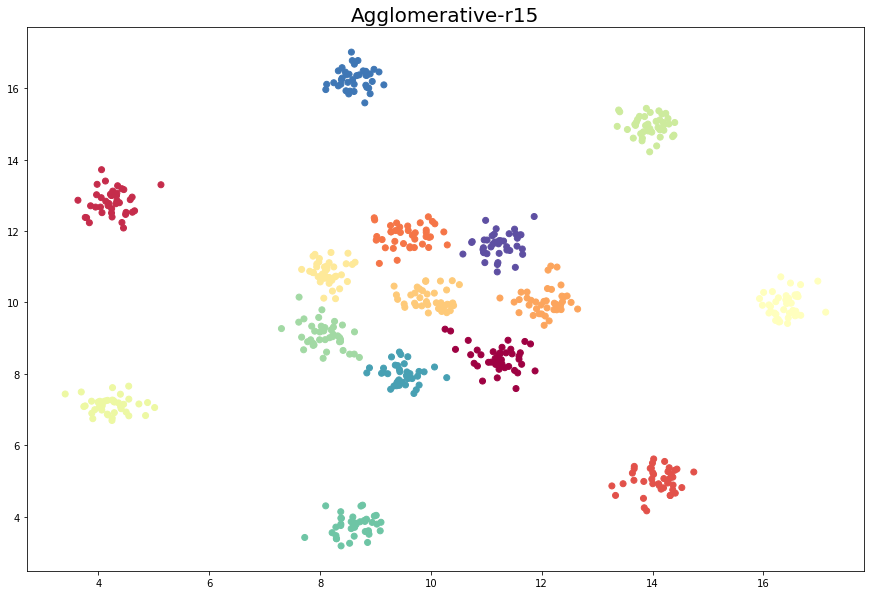

None


TypeError: '>=' not supported between instances of 'int' and 'NoneType'

In [85]:
overall_plot_builder(r15, 'r15', 15) #Kmeans with 15 clusters

---

### 4.7 Find good parameters for the `spiral` dataset

Which algorithm (visually) performs best?

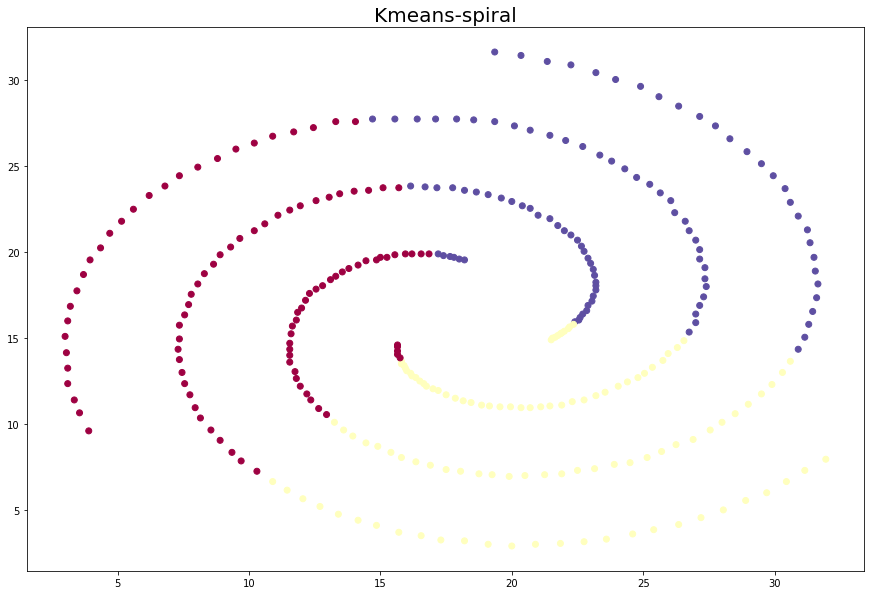

None


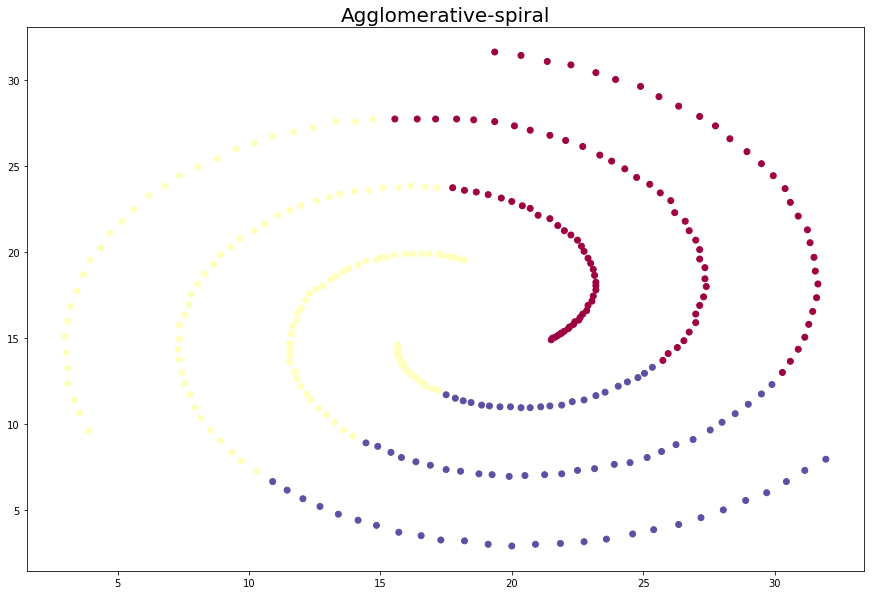

None


TypeError: '>=' not supported between instances of 'int' and 'NoneType'

In [88]:
overall_plot_builder(spiral, 'spiral', 3) #Agglomerative or Kmeans algorithim with 3 clusters seems like a good choice

---

## 5. [Bonus] Explore some other clustering algorithms

sklearn comes with a variety of unsupervised clustering algorithms, some of which we have not covered in class. Two algorithms in particular may be of interest to you:

1. [Affinity Propagation](http://scikit-learn.org/dev/modules/clustering.html#affinity-propagation) finds clusters by "sending messages" from points to other points. Points group into clusters based on a "damping factor". The main appeal of affinity propagation is that the number of clusters do not need to be specified by the user (like DBSCAN).
- [Birch](http://scikit-learn.org/dev/modules/clustering.html#birch) finds clusters with a tree-based algorithm (somewhat) reminiscent of decision trees. It finds clusters by evaluating branches/nodes on a tree that best describe the features of the data.